In [94]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [95]:
data=pd.read_csv("Hitters.csv")

In [96]:
data.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [97]:
#remove categorical variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
Unnamed: 0    322 non-null object
AtBat         322 non-null int64
Hits          322 non-null int64
HmRun         322 non-null int64
Runs          322 non-null int64
RBI           322 non-null int64
Walks         322 non-null int64
Years         322 non-null int64
CAtBat        322 non-null int64
CHits         322 non-null int64
CHmRun        322 non-null int64
CRuns         322 non-null int64
CRBI          322 non-null int64
CWalks        322 non-null int64
League        322 non-null object
Division      322 non-null object
PutOuts       322 non-null int64
Assists       322 non-null int64
Errors        322 non-null int64
Salary        263 non-null float64
NewLeague     322 non-null object
dtypes: float64(1), int64(16), object(4)
memory usage: 52.9+ KB


In [98]:
data1 = data.drop(columns=['League','Division','NewLeague','Unnamed: 0'])

In [99]:
data1=data1.dropna()

In [100]:
#Set the predictor
y=data1['Salary']
x=data1.drop(['Salary'],axis=1)

# 1.1 

Text(0, 0.5, 'weights')

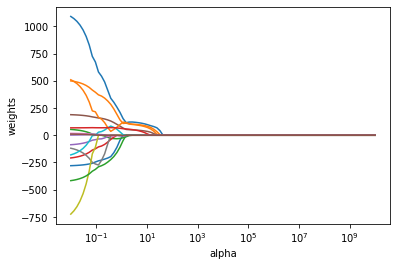

In [101]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

#Set the alpha sequence
alphas = 10**np.linspace(10,-2,100)*0.5 

#Fit the Lasso model for different alphas
lasso = Lasso(max_iter=100000,normalize=True)
coefs = []

for alpha in alphas:
    lasso.set_params(alpha=alpha)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [102]:
lasso.set_params(alpha=11)
lasso.fit(x,y)
pd.Series(lasso.coef_, index=x.columns)

AtBat      0.000000
Hits       0.037439
HmRun      0.000000
Runs       0.000000
RBI        0.000000
Walks      0.000000
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.000000
CRuns      0.062909
CRBI       0.176160
CWalks     0.000000
PutOuts    0.000000
Assists    0.000000
Errors     0.000000
dtype: float64

In [103]:
#so final three predictors are 'Hints','CRuns',and'CRBI'.

In [104]:
#corss validation
lassocv = LassoCV(alphas=alphas, cv=10, max_iter=10000, normalize=True)
lassocv.fit(X_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=0.24885117821660568, copy_X=True, fit_intercept=True,
      max_iter=100000, normalize=True, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [105]:
# Find the optimal value of regularization penalty
print("The optimal value of regularization penalty is: "+str(lassocv.alpha_))

The optimal value of regularization penalty is: 0.24885117821660568


In [106]:
# Find predictors left in model
pd.Series(lasso.coef_, index=x.columns)
#6 predictors are left.

AtBat     -1.105247
Hits       5.471911
HmRun     -3.557576
Runs      -0.697389
RBI       -0.000000
Walks      5.480738
Years     -1.270438
CAtBat    -0.000000
CHits      0.000000
CHmRun     0.842915
CRuns      0.889243
CRBI       0.160348
CWalks    -0.710468
PutOuts    0.232201
Assists   -0.000000
Errors    -0.000000
dtype: float64

# 1.2 Ridge 

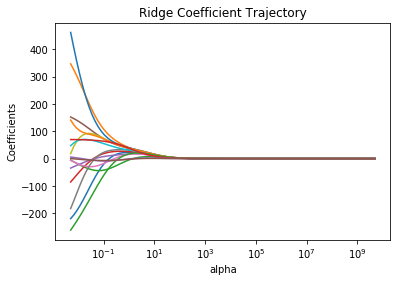

In [107]:

# Fit for Ridge Regression using different alphas
ridge = Ridge(normalize=True)
coefs = []

for alpha in alphas:
    ridge.set_params(alpha=alpha)
    ridge.fit(scale(X_train), y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Ridge Coefficient Trajectory')
plt.show()

In [108]:
#corss validation
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', normalize=True)
ridgecv.fit(X_train, y_train)
ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5748784976988678, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [109]:
print("The optimal value of regularization penalty is: "+str(ridgecv.alpha_))

The optimal value of regularization penalty is: 0.5748784976988678


In [110]:
# Find predictors left in model
pd.Series(ridge.coef_, index=x.columns)

AtBat      0.151464
Hits       1.138603
HmRun     -1.656723
Runs       1.067978
RBI        0.605166
Walks      2.028390
Years      2.245804
CAtBat     0.013922
CHits      0.067434
CHmRun     0.410078
CRuns      0.135267
CRBI       0.132815
CWalks     0.033163
PutOuts    0.155857
Assists   -0.022949
Errors    -0.628018
dtype: float64

# 2. short answer

In [111]:
#Explain in your own words the bias-variance tradeoff. 

#In my view, the bias-variance tradeoff should be seen as a balance problem, like a seesaw. We need to find the balance
#point bwteen bias and variance. Ideally, low bias and low variance make a good model, however, it's pretty hard to achieve
#this. Sometimes when we meet the overfitting problem, the variance will be high and the bias will be low. In contrast, when
# we meet the underfitting problem, the variance will be low and the bias will be high. So in my view, when we need a model are flexible,
#the variance could be lower and the bias could be larger and the model will not overfitting. 
#Similarly, if we sacrifice some flexibility to the model,the model will have lower bias and larger variance. 
# so the bias-variance tradeoff could be seen as a processing to balance the bias and variance.

In [112]:
#What role does regularization play in this tradeoff?

# Regularization can add tuning parameter to a model and prevent overfitting. In other words, it makes the bias higher
# and the overall variance could be lower to get a better model.

In [113]:
#Make reference to your findings in number (1) to describe models of high/low bias and variance.

#Here in Lasso and Ridge regression models, tthe value of alpha decides the size of penality. 
#The larger the penalty, the more bias will be added. Thus the variance of the model will be lower.
#if the value of alpha is close to infinity, the coefficient would get close to 0
#In contrast, if the value of alpha is close to 0, then we will get a ordinary least square model that has very low bias.